## Part 1: The Invarient Mass Distribution

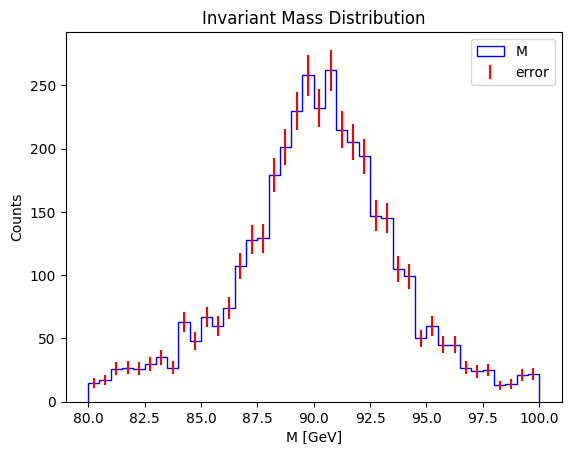

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt("atlas_z_to_ll.csv", skiprows = 1, delimiter = ',')

Pt1 = data[:,0]
Pt2 = data[:,1]

n1 = data[:,2]
n2 = data[:,3]

phi1 =data[:,4]
phi2 = data[:,5]

E1 = data[:,6]
E2 = data[:,7]


def P(Pt, phi,n):
    return Pt*np.cos(phi), Pt*np.sin(phi), Pt*np.sinh(n)
def Ptot(Px,Py,Pz):
    return Px**2+Py**2+Pz**2


    

Px1,Py1,Pz1 = P(Pt1,phi1,n1)
Px2,Py2,Pz2 = P(Pt2,phi2,n2)

Pxt = Px1 + Px2
Pyt = Py1 + Py2
Pzt = Pz1 + Pz2

Pt = Ptot(Pxt, Pyt, Pzt)
Et = E1+E2

Total = (Et)**2 - Pt

M = np.sqrt(Total)


#3

bins = np.linspace(80,100,41)

fig, ax = plt.subplots()

counts, bin_edges,_ = ax.hist(M, bins = bins, color = 'blue', label = 'M',histtype='step')
sigma = np.sqrt(counts)
middle = (bin_edges[:-1] + bin_edges[1:]) / 2
ax.errorbar(middle, counts, yerr = sigma, fmt = ',', color = 'red', label = 'error')
ax.set_xlabel('M [GeV]')
ax.set_ylabel('Counts') 
ax.set_title('Invariant Mass Distribution') 
ax.legend()


#%% PART2

#%% Number 3

## Part 2: Breit - Wigner Fit 

chi2 = 9.99 with 10 degrees of freedom
The reduced chi2 is 1.00 with a p-value of 0.4418.
The parameters are m0 = 90.34 and T = 6.39.
The errors are 0.09 and 0.18.


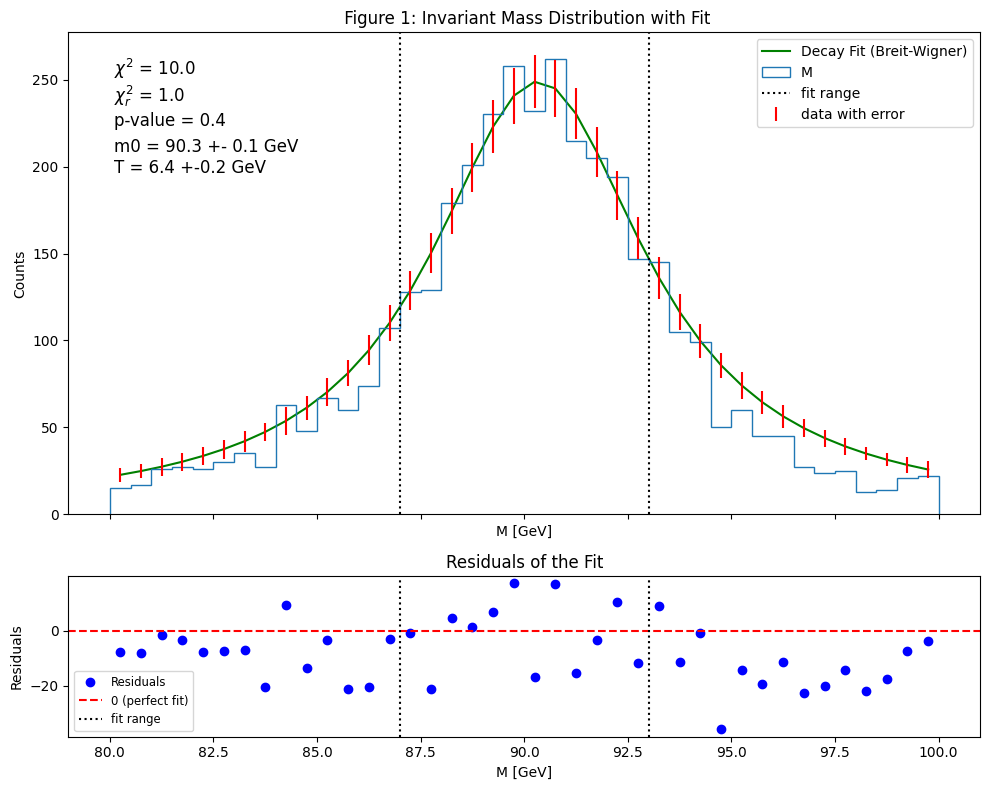

In [63]:
#1 and 2

mask = (middle > 87) & (middle < 93)   


from scipy.optimize import curve_fit

def decay(m,m0,T):
    return 2500* 1/np.pi * (T/2)/((m-m0)**2 + (T/2)**2) 



params, covar = curve_fit(decay, middle[mask], counts[mask], sigma = sigma[mask])
Error = np.sqrt(np.diag(covar))
m0, T = params
decay_fit = decay(middle, m0, T)



#3 
fig2,ax2 = plt.subplots(2,1,sharex=True, figsize = (10,8), gridspec_kw={'height_ratios':[3,1]})
Ebar = np.ones(len(middle))*sigma
ax2[0].plot(middle, decay_fit, color = 'green', label = 'Decay Fit (Breit-Wigner)')
ax2[0].hist(M, bins = bins, label = 'M', histtype = 'step')
ax2[0].axvline(87, color='black', linestyle=':', label = 'fit range')
ax2[0].axvline(93, color='black', linestyle=':')
ax2[0].errorbar(middle, decay(middle, m0, T), yerr = Ebar, fmt = ',', color = 'red', label = 'data with error')
ax2[0].set_xlabel('M [GeV]')
ax2[0].set_ylabel('Counts') 
ax2[0].set_title(' Figure 1: Invariant Mass Distribution with Fit')
ax2[0].legend()

residuals = (counts - decay_fit)
ax2[1].plot(middle, residuals,'o', color = 'blue', label = 'Residuals')

ax2[1].axhline(0, color='red', linestyle='--', label = '0 (perfect fit)')
ax2[1].axvline(87, color='black', linestyle=':', label = 'fit range')
ax2[1].axvline(93, color='black', linestyle=':')
ax2[1].set_xlabel('M [GeV]')
ax2[1].set_ylabel('Residuals')
ax2[1].set_title('Residuals of the Fit')
ax2[1].legend(fontsize = 'small')
fig2.tight_layout()



#%% Number 4
import scipy.stats as st
ch2isq = (counts[mask] - decay_fit[mask])**2/sigma[mask]**2
ndof = len(counts[mask]) - 2
chi2 = np.sum(ch2isq)
print(f"chi2 = {chi2:.2f} with {ndof} degrees of freedom")

reduced_chi2 = chi2/ndof
p = st.chi2.sf(chi2, ndof)
ax2[0].text(0.05, 0.95, f'$\chi^2$ = {chi2:.1f}\n$\chi^2_r$ = {reduced_chi2:.1f}\np-value = {p:.1f}', transform=ax2[0].transAxes, fontsize=12, verticalalignment='top')
ax2[0].text(0.05, 0.78, f'm0 = {m0:.1f} +- {Error[0]:.1f} GeV\nT = {T:.1f} +-{Error[1]:.1f} GeV', transform=ax2[0].transAxes, fontsize=12, verticalalignment='top')
print(f"The reduced chi2 is {reduced_chi2:.2f} with a p-value of {p:.4f}.") 
print(f"The parameters are m0 = {m0:.2f} and T = {T:.2f}.") 
print(f"The errors are {Error[0]:.2f} and {Error[1]:.2f}.")
plt.savefig('Lab3_figure1.png')

## Part 3: 2D Parameter Contours

90.34080586024453


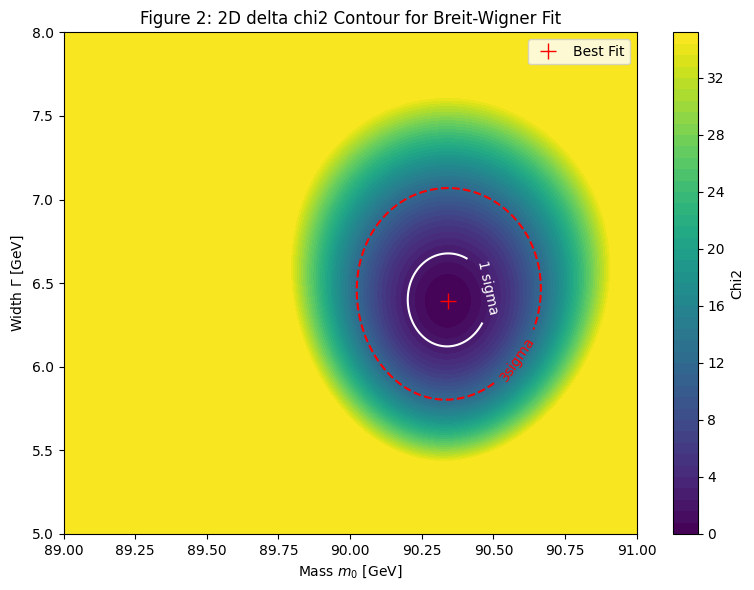

In [66]:

m0_vals = np.linspace(89, 91, 300)  
T_vals = np.linspace(5, 8, 300)     

M0, Tgrid = np.meshgrid(m0_vals, T_vals)
chi2_map = np.zeros_like(M0)


for i in range(M0.shape[0]):
    for j in range(M0.shape[1]):
        model = decay(middle[mask], M0[i, j], Tgrid[i, j])
        chi2_map[i, j] = np.sum(((counts[mask] - model) / sigma[mask])**2)


delta_chi2 = chi2_map - np.min(chi2_map)




fig, ax = plt.subplots(figsize=(8, 6))
cmap = ax.contourf(M0, Tgrid, np.clip(delta_chi2, 0, 35), levels=50, cmap='viridis')
cbar = fig.colorbar(cmap, ax=ax)
cbar.set_label("Chi2")


contours = ax.contour(M0, Tgrid, delta_chi2, levels=[2.3, 11.83], colors=['white', 'red'], linestyles=['solid', 'dashed'])
ax.clabel(contours, fmt={2.3: '1 sigma', 11.83: '3sigma'}, fontsize=10)


ax.plot(m0, T, 'r+', markersize=12, label='Best Fit')
print(m0)

ax.set_xlabel('Mass $m_0$ [GeV]')
ax.set_ylabel('Width $\\Gamma$ [GeV]')
ax.set_title('Figure 2: 2D delta chi2 Contour for Breit-Wigner Fit')
ax.legend()
fig.tight_layout()

plt.savefig('Lab3_figure2.png')